#  I- Régression Linéaire Multiple

On parle de Régression Linéaire Multiple lorsqu'on integre plusieures variables $x_1,x_2,....x_n$
 à notre modèle et que les choses commencent à devenir vraiment intéressantes. 
Le but de la Régression Linéaire Multiple est de rouver le meilleur ensemble  $\theta=(\theta_0,\theta_1,...., \theta_n)$ revient à  minimiser le coût global des erreurs unitaires qui se définit comme suit :
		$$  \min J(\theta)=\min_{\theta}\frac{1}{2m}\sum_{i=0}^{m} (h_\theta(x(i))-y(i))^2$$
avec $m$ est la taille du training set.
Avec $$h_\theta(x)=\theta_0+\theta_1 x_1+\theta_2x_2+.....+\theta_n x_n $$  


# 1-datasets

###   Créer un modèle à deux variables de régression linéaire multiple (n=2), 
 (x,y) avec $m$ exemples, $2$ variables 
		
$
			X=\begin{pmatrix} 
			x_1^{(1)}&	x_2^{(1)}&1\\                
			x_1^{(2)}&x_2^{(2)}&1\\ 
			..&..&..1\\ 
			..&..&..1\\ 
			x_1^{(m)}&x_2^{(m)}&1
			\end{pmatrix}\notag
			$
            
$       Y= \begin{pmatrix}
		Y^{(1)}\\ 
		Y^{(2)}\\
		.....\\
		.....\\
		Y^{(m)}
        \end{pmatrix}
        $
            
$           \theta=\begin{pmatrix} 
			\theta_1\\ 
			\theta_2\\ 
			\theta_0
			\end{pmatrix}
            $
	
  

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

sns.set_style('ticks')

##### 1-Générer de données aléatoires

In [7]:
np.random.seed(0)
x,y = make_regression(n_samples=100, n_features=2, noise=10)
X = np.concatenate((x,np.ones((100,1))), axis=1)


#### 2-Afficher les données en 2D puis en 3D


Text(0.5, 1.0, 'x [1]')

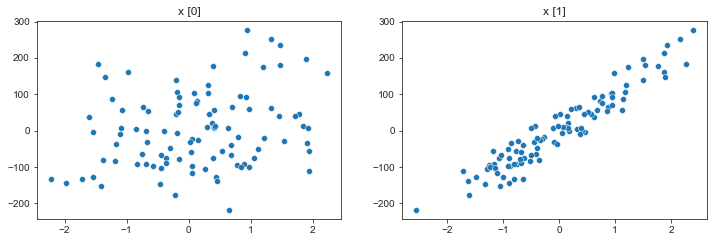

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.scatterplot(x=x[:,0],y=y)
plt.title('x [0]')

plt.subplot(2,2,2)
sns.scatterplot(x=x[:,1],y=y)
plt.title('x [1]')

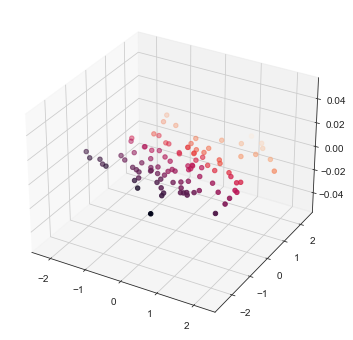

In [9]:
plt.figure(figsize=(12,6))
ax = plt.axes(projection='3d')

ax.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

#### 3-redimentioner les matrices, créer la matrice X et $\theta$

In [10]:
y = y.reshape(x.shape[0],1)
print('X :',X.shape)
print('y :',y.shape)

theta = np.random.random((3,1))
print('theta :', theta)

X : (100, 3)
y : (100, 1)
theta : [[0.74878826]
 [0.23780724]
 [0.1718531 ]]


#### 4-Implémenter le model de prédiction, Fonction cout, Gradients et Descente de Gradient

In [11]:
def model(X,theta):
    return X.dot(theta)

In [12]:
def cost(X,y,theta):
    m = len(X)
    mod = model(X,theta)
    return 1/2*m * np.sum((mod-y)**2)

In [13]:
def gradient(X,y,theta):
    m = len(X)
    mod = model(X,theta)
    return 1/m * X.T.dot(mod - y)

In [14]:
def gradient_descent(X,y,theta,learning_rate,n_iter):
    cost_hist = []
    for i in range(n_iter):
        theta = theta - learning_rate*gradient(X,y,theta)
        cost_hist.append(cost(X,y,theta))
        
    return theta, cost_hist

 #### 5-Afficher les valeurs de $\theta$


In [15]:
theta, cost_hist = gradient_descent(X,y,theta,0.01,1000)
print(theta.shape)
theta

(3, 1)


array([[28.67161789],
       [97.29524617],
       [-0.51155129]])

### 6-Afficher les résultats de prédictions par rapport a notre Dataset ainsi que la courbe d'apprentissage

In [16]:
predictions = model(X,theta)
predictions.shape

(100, 1)

Text(0.5, 1.0, 'x [1]')

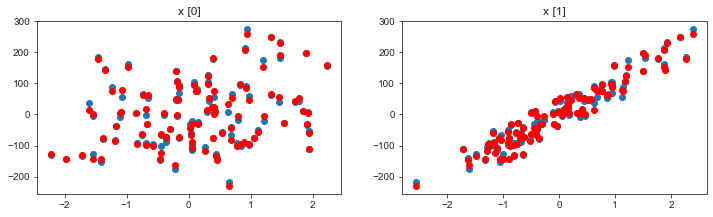

In [17]:
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], predictions, c='r')
plt.title('x [0]')

plt.subplot(2,2,2)
plt.scatter(x[:,1],y)
plt.scatter(x[:,1], predictions, c='r')
plt.title('x [1]')

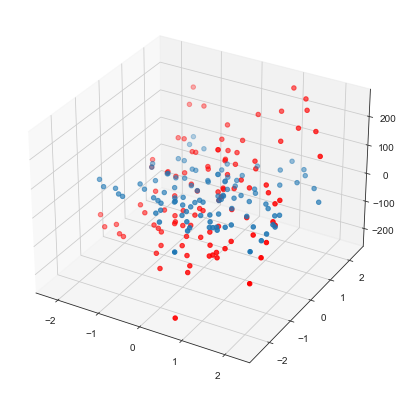

In [18]:
plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.scatter(x[:, 0], x[:, 1])
ax.scatter(x[:, 0], x[:, 1], predictions, c='r')
plt.show()

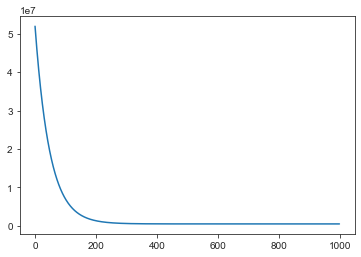

In [19]:
plt.plot(range(1000), cost_hist)

### 7-Utiliser le coefficient de détermination pour évaluer la réelle performance et interpréter le resultats

In [20]:
def determination_coef(Y,predictions):
    cost = np.sum((Y - predictions)**2)
    cost_y = np.sum((Y - np.mean(Y))**2)
    return 1 - cost/cost_y

In [21]:
determination_coef(y,predictions)

0.9916687122884432

#  II- Régression Polynomiale

Pour développer un modèle polynomial à partir des équations de la régression linéaire, il suffit d'ajouter des degrés de polynome dans les colonnes de la matrice. On développera un modèle qui vise à chercher la fonction de prédiction $$h_\theta(x)=\theta_0+\theta_1 x+\theta_2x^2+.....+\theta_n x^n $$  

# 1-datasets
	Pour n=2, on a 
$
			X=\begin{pmatrix} 
			x^{(1)}&	x^{2^{(1)}}&1\\                
			x^{(2)}&x^{2^{(2)}}&1\\ 
			..&..&..1\\ 
			..&..&..1\\ 
			x^{(m)}&x^{2^{(m)}}&1
			\end{pmatrix}\notag
			$
            
$       Y= \begin{pmatrix}
		Y^{(1)}\\ 
		Y^{(2)}\\
		.....\\
		.....\\
		Y^{(m)}
        \end{pmatrix}
        $
            
$           \theta=\begin{pmatrix} 
			\theta_1\\ 
			\theta_2\\ 
			\theta_0
			\end{pmatrix}
            $
	

 ### Refaire les mêmes étapes pour créer un model de prédiction par la régression polynomiale
  NB:modifier les valeurs de y pour rendre le dataset non-linéaire ( utiliser une fonction non linéaire)

In [22]:
import numpy as np
np.random.seed(0)
x,y = make_regression(n_samples=100, n_features=1   , noise=10)
y = y.reshape(-1,1)
X = np.concatenate((x,x**2,np.ones((100,1))), axis=1)

y = 0.75*y+ 0.98*y**2
t = np.random.random((3,1))

print(X.shape)
print(y.shape)
print(t.shape)
t

(100, 3)
(100, 1)
(3, 1)


array([[0.27032791],
       [0.1314828 ],
       [0.05537432]])

Text(0.5, 1.0, 'x [0]')

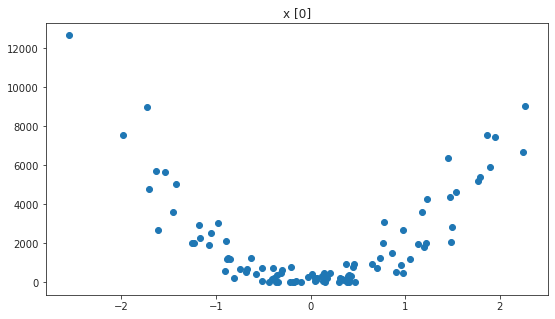

In [18]:
plt.figure(figsize=(9,5))
plt.scatter(x[:,0],y)
plt.title('x [0]')

In [23]:
 theta_2, cost_hist_2 = gradient_descent(X,y,t,0.01,1000)
print(theta_2.shape)
theta_2

(3, 1)


array([[-127.7722404 ],
       [1814.09222959],
       [  84.45068612]])

In [20]:
predictions_2 = model(X,theta_2)
predictions_2[:10]

array([[ 364.91467783],
       [1689.9876861 ],
       [ 326.70565959],
       [1387.83846427],
       [1627.68640222],
       [ 385.13988588],
       [1941.90846309],
       [ 362.54998363],
       [ 136.53146455],
       [ 300.34327764]])

Text(0.5, 1.0, 'x [0]')

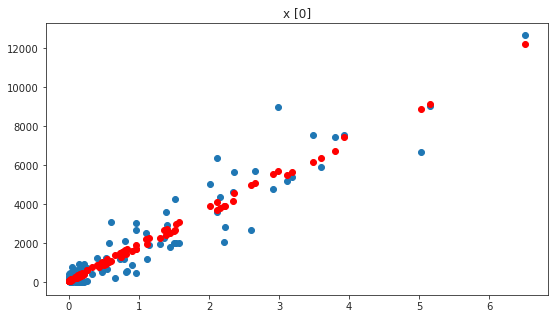

In [21]:
plt.figure(figsize=(9,5))
plt.scatter(X[:,1],y)
plt.scatter(X[:,1], predictions_2,c="r")
plt.title('x [0]')

In [22]:
x.shape

(100, 1)

Text(0.5, 1.0, 'x [0]')

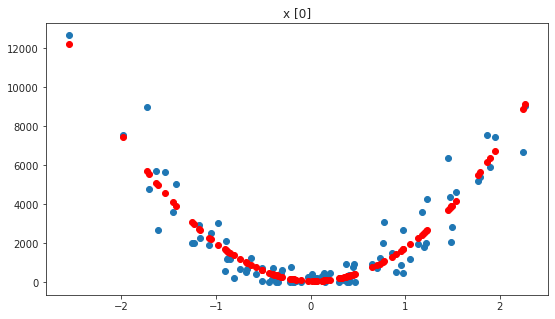

In [23]:
plt.figure(figsize=(9,5))
plt.scatter(X[:,0],y)
plt.scatter(X[:,0], predictions_2,c="r")
plt.title('x [0]')

In [24]:
determination_coef(y,predictions_2)

0.8939781415046628

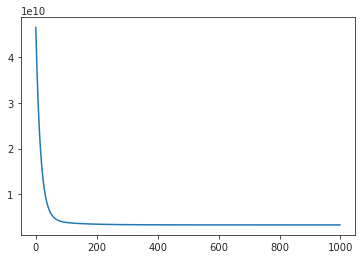

In [25]:
plt.plot(range(1000), cost_hist_2)

# III- Régressions linéaires avec Statsmodels et Scikit-Learn
 En utilisant les données du fichiers "mtcars.csv", on vise à prédire la consommation d'essence du véhicule "mpg" en fonction du poids du véhicule "wt" et la puissance du vehicule "hp" (horse power) en appliquant la régression linéaire multiple et polynomiale.

## 1-Regression  multiple en utilisant Scikit-Learn 
    1-importer les données 
    2-faites appel à "linear_model.LinearRegression" de Scikit-Learn 
    3-Vous faites la prédiction
    4-Afficher en 3d les résultats 
    5-Quel est la consommation d'essence du véhicule prédite avec le poids de 3.1 et une puissance de 120

In [26]:
data = pd.read_csv("mtcars.csv")
data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [27]:
data.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [28]:
features = data[['hp','wt']]
label = data['mpg'].values
label = label.reshape(-1,1)
print('features :',features.shape)
print('label :',label.shape)

features : (32, 2)
label : (32, 1)


In [29]:
from sklearn.linear_model import LinearRegression 

In [30]:
lin_model = LinearRegression()
lin_model.fit(features, label)
pred = lin_model.predict(features)

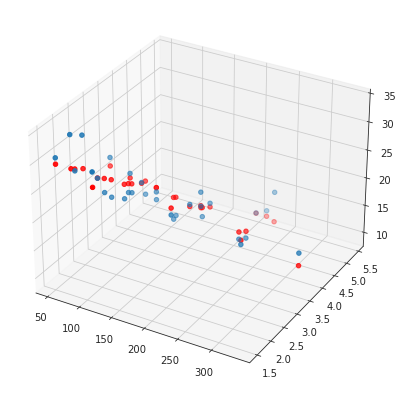

In [31]:
plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.scatter(features['hp'], features['wt'],label)
ax.scatter(features['hp'], features['wt'], pred,c='r')
plt.show()

## 2-Regression  multiple en utilisant statsmodels
    refaire les memes etatpes, comparer les résultas

In [32]:
import statsmodels.api as sm

In [34]:
stats_model = sm.OLS(label,features.values).fit()
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.726
Model:                            OLS   Adj. R-squared (uncentered):              0.708
Method:                 Least Squares   F-statistic:                              39.83
Date:                Wed, 09 Feb 2022   Prob (F-statistic):                    3.60e-09
Time:                        09:08:17   Log-Likelihood:                         -122.01
No. Observations:                  32   AIC:                                      248.0
Df Residuals:                      30   BIC:                                      251.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0339      0.039     -0.861      0.396      -0.114       0.047
x2             6.8404      1.894      3.611      0.001       2.972      10.709
==============================================================================
Omnibus:                        0.301   Durbin-Watson:                   0.735
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.044
Skew:                           0.090   Prob(JB):                        0.978
Kurtosis:                       2.994   Cond. No.                         153.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""